In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

# supercell case (29-30 May 2012, Oklahoma)

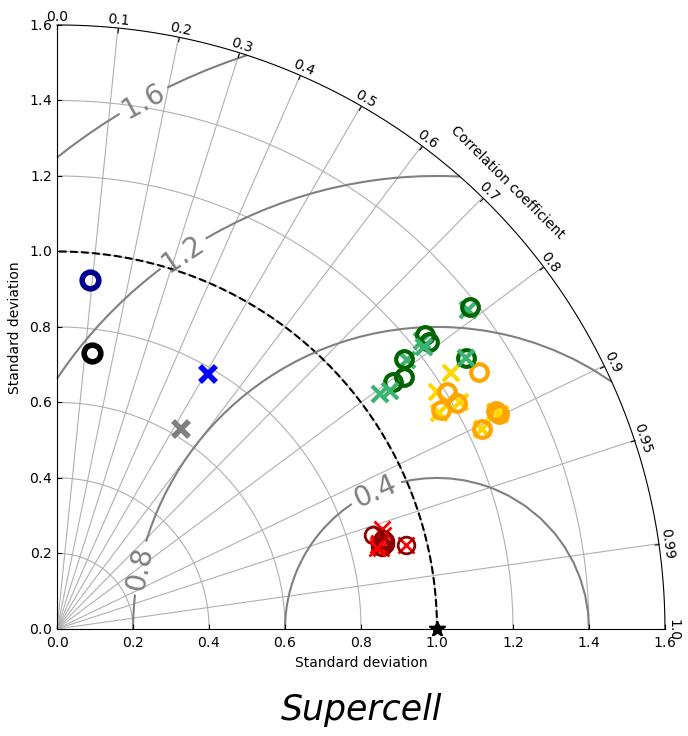

In [71]:
class TaylorDiagram(object):
  def __init__(self, STD ,fig=None, rect=111, label='_'):
    self.STD = STD
    tr = PolarAxes.PolarTransform()
    # Correlation labels
    rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))
    tlocs = np.arccos(rlocs) # Conversion to polar angles
    gl1 = gf.FixedLocator(tlocs) # Positions
    tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
    # Standard deviation axis extent
    self.smin = 0
    self.smax = 1.6 * self.STD
    gh = fa.GridHelperCurveLinear(tr,extremes=(0,(np.pi/2),self.smin,self.smax),grid_locator1=gl1,tick_formatter1=tf1,)
    if fig is None:
      fig = plt.figure()
    ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
    fig.add_subplot(ax)
    
    plt.title("Supercell",y=-0.15,style='italic',fontsize = 25)
    
    # Angle axis
    ax.axis['top'].set_axis_direction('bottom')
    ax.axis['top'].label.set_text("Correlation coefficient")
    ax.axis['top'].toggle(ticklabels=True, label=True)
    ax.axis['top'].major_ticklabels.set_axis_direction('top')
    ax.axis['top'].label.set_axis_direction('top')
    # X axis
    ax.axis['left'].set_axis_direction('bottom')
    ax.axis['left'].label.set_text("Standard deviation")
    ax.axis['left'].toggle(ticklabels=True, label=True)
    ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
    ax.axis['left'].label.set_axis_direction('bottom')
    # Y axis
    ax.axis['right'].set_axis_direction('top')
    ax.axis['right'].label.set_text("Standard deviation")
    ax.axis['right'].toggle(ticklabels=True, label=True)
    ax.axis['right'].major_ticklabels.set_axis_direction('left')
    ax.axis['right'].label.set_axis_direction('top')
    # Useless
    ax.axis['bottom'].set_visible(False)
    # Contours along standard deviations
    ax.grid()
    self._ax = ax # Graphical axes
    self.ax = ax.get_aux_axes(tr) # Polar coordinates
    # Add reference point and STD contour
    l , = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
    l1 , = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
    t = np.linspace(0, (np.pi / 2.0))
    t1 = np.linspace(0, (np.pi / 2.0))
    r = np.zeros_like(t) + self.STD
    r1 = np.zeros_like(t) + self.STD
    self.ax.plot(t, r, 'k--', label='_')
    # Collect sample points for latter use (e.g. legend)
    self.samplePoints = [l]
    self.samplePoints = [l1]
  
  def add_sample(self,STD,r,*args,**kwargs):
    l,= self.ax.plot(np.arccos(r), STD, *args, **kwargs) # (theta, radius)
    self.samplePoints.append(l)
    return l

  def add_sample(self,STD,r1,*args,**kwargs):
    l1,= self.ax.plot(np.arccos(r1), STD, *args, **kwargs) # (theta, radius)
    self.samplePoints.append(l1)
    return l1

  def add_contours(self,levels=5,**kwargs):
    rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, (np.pi / 2.0)))
    RMSE=np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs  *np.cos(ts)))
    contours = self.ax.contour(ts, rs, RMSE, levels, **kwargs)
    return contours

def srl(obsSTD, s, s1, s2, s3, s4, s5, s6, s7, s8, s9, r, r1, r2, r3, r4, r5, r6, r7, r8, r9, l, l1, l2, l3, l4, l5, l6, l7, l8, l9,  fname):
  fig=plt.figure(figsize=(8,8))
  dia=TaylorDiagram(obsSTD, fig=fig, rect=111, label='ref')
  plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=20)
  srlc = zip(s, r, l)
  srlc1 = zip(s1, r1, l1)
  srlc2 = zip(s2, r2, l2)
  srlc3 = zip(s3, r3, l3)  
  srlc4 = zip(s4, r4, l4)  
  srlc5 = zip(s5, r5, l5)
  srlc6 = zip(s6, r6, l6)
  srlc7 = zip(s7, r7, l7)  
  srlc8 = zip(s8, r8, l8)  
  srlc9 = zip(s9, r9, l9)


  for i in srlc:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'red', mfc = 'none', mew=2, ms=12)
  for i in srlc1:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'darkred', mfc = 'none', mew=2, ms=12)
  for i in srlc2:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'gold', mfc = 'none', mew=3, ms=12)
  for i in srlc3:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'orange', mfc = 'none', mew=3, ms=12)
  for i in srlc4:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'mediumseagreen', mfc = 'none', mew=3, ms=12)
  for i in srlc5:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'darkgreen', mfc = 'none', mew=3, ms=12)
    
  for i in srlc6:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'gray', mfc = 'none', mew=4, ms=12)
  for i in srlc7:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'black', mfc = 'none', mew=4, ms=12)
  for i in srlc8:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'blue', mfc = 'none', mew=4, ms=12)
  for i in srlc9:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'darkblue', mfc = 'none', mew=4, ms=12)
    
  
  #spl = [p.get_label() for p in dia.samplePoints]
  #fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='small'), loc=[-0.25,0.3])
  #plt.show()

obsSTD = 1

###Temp
# "KF_w/LTGDA"
l = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s= [0.9443035751, 0.877677522213597, 0.868400232781328, 0.873280860935816, 0.878119014813798, 0.8920402613694, 0.8954523948]
r= [0.97211, 0.96999,0.96906, 0.96729, 0.96612, 0.96036, 0.95489]

# "KF_wo/LTGDA"
l1 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s1= [0.944303575099904, 0.881934727669445, 0.877872214224548, 0.893480296955287, 0.891931823125894, 0.890834646919624, 0.868342282524524]
r1= [0.97211, 0.96932, 0.96829, 0.96551,0.96733, 0.96322,0.9584]

###u comp wind
# "KF_w/LTGDA"
l2 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s2= [1.23603507,1.296830944,1.289529865,1.157224906,1.219853916,1.181688654,1.238522174]
r2= [0.90378,0.89821,0.8948,0.86907,0.87019,0.84676,0.83677]

# "KF_wo/LTGDA"
l3= ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s3= [1.23603507,1.294579502,1.292389163,1.164931421,1.210408242,1.202090544,1.300943729]
r3= [0.90378,0.89785,0.89467,0.86772,0.86947,0.85268,0.85265]

###v comp wind
# "KF_w/LTGDA"
l4 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s4= [1.293913203,1.374071312,1.226747104,1.220857962,1.164782076,1.053240683,1.079324607]
r4= [0.83194,0.78807,0.78287,0.79032,0.7907,0.80633,0.81174]

# "KF_wo/LTGDA"
l5 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s5= [1.293913203,1.381598929,1.241886632,1.240253003,1.160880506,1.098871249,1.129526381]
r5= [0.83194,0.78651,0.77982,0.79029,0.78715,0.80399,0.80761]


####IMERG

# "KF_w/LTGDA"
l6= ['w/LDA IMERG']
r6= [0.52521]
s6= [0.6211477877]

# "KF_wo/LTGDA"
l7 = ['wo/LDA IMERG']
r7= [0.12359]
s7= [0.73555084]


####Stage-IV

# "KF_w/LTGDA"
l8 = ['w/LDA Stage-IV']
r8= [0.50615]
s8= [0.7836633754]

# "KF_wo/LTGDA"
l9 = ['wo/LDA Stage-IV']
r9= [0.09371]
s9= [0.927998562599489]


fname = 'TaylorDiagram.jpg'
srl(obsSTD, s, s1, s2, s3, s4, s5, s6, s7, s8, s9, r, r1, r2, r3, r4, r5, r6, r7, r8, r9, l, l1, l2, l3, l4, l5, l6, l7, l8, l9, fname)

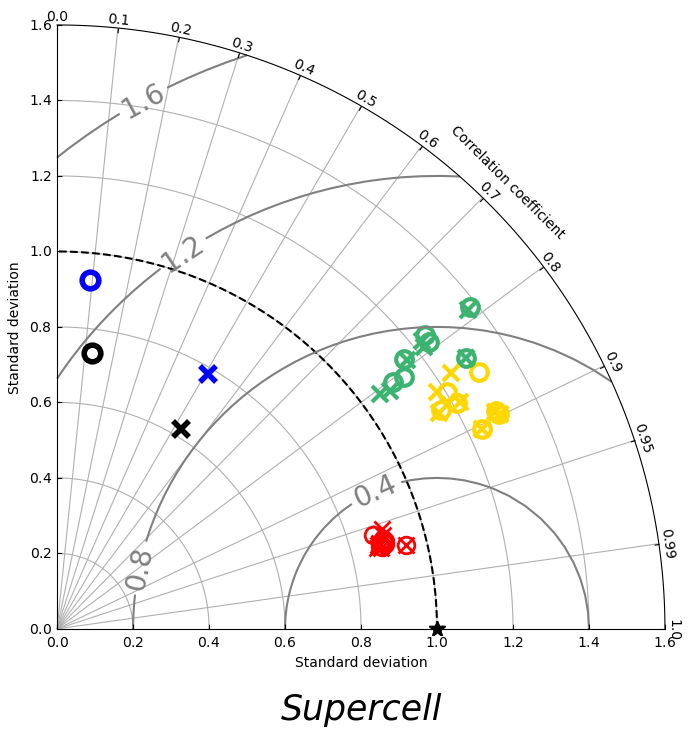

In [72]:
class TaylorDiagram(object):
  def __init__(self, STD ,fig=None, rect=111, label='_'):
    self.STD = STD
    tr = PolarAxes.PolarTransform()
    # Correlation labels
    rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))
    tlocs = np.arccos(rlocs) # Conversion to polar angles
    gl1 = gf.FixedLocator(tlocs) # Positions
    tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
    # Standard deviation axis extent
    self.smin = 0
    self.smax = 1.6 * self.STD
    gh = fa.GridHelperCurveLinear(tr,extremes=(0,(np.pi/2),self.smin,self.smax),grid_locator1=gl1,tick_formatter1=tf1,)
    if fig is None:
      fig = plt.figure()
    ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
    fig.add_subplot(ax)
    
    plt.title("Supercell",y=-0.15,style='italic',fontsize = 25)
    
    # Angle axis
    ax.axis['top'].set_axis_direction('bottom')
    ax.axis['top'].label.set_text("Correlation coefficient")
    ax.axis['top'].toggle(ticklabels=True, label=True)
    ax.axis['top'].major_ticklabels.set_axis_direction('top')
    ax.axis['top'].label.set_axis_direction('top')
    # X axis
    ax.axis['left'].set_axis_direction('bottom')
    ax.axis['left'].label.set_text("Standard deviation")
    ax.axis['left'].toggle(ticklabels=True, label=True)
    ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
    ax.axis['left'].label.set_axis_direction('bottom')
    # Y axis
    ax.axis['right'].set_axis_direction('top')
    ax.axis['right'].label.set_text("Standard deviation")
    ax.axis['right'].toggle(ticklabels=True, label=True)
    ax.axis['right'].major_ticklabels.set_axis_direction('left')
    ax.axis['right'].label.set_axis_direction('top')
    # Useless
    ax.axis['bottom'].set_visible(False)
    # Contours along standard deviations
    ax.grid()
    self._ax = ax # Graphical axes
    self.ax = ax.get_aux_axes(tr) # Polar coordinates
    # Add reference point and STD contour
    l , = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
    l1 , = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
    t = np.linspace(0, (np.pi / 2.0))
    t1 = np.linspace(0, (np.pi / 2.0))
    r = np.zeros_like(t) + self.STD
    r1 = np.zeros_like(t) + self.STD
    self.ax.plot(t, r, 'k--', label='_')
    # Collect sample points for latter use (e.g. legend)
    self.samplePoints = [l]
    self.samplePoints = [l1]
  
  def add_sample(self,STD,r,*args,**kwargs):
    l,= self.ax.plot(np.arccos(r), STD, *args, **kwargs) # (theta, radius)
    self.samplePoints.append(l)
    return l

  def add_sample(self,STD,r1,*args,**kwargs):
    l1,= self.ax.plot(np.arccos(r1), STD, *args, **kwargs) # (theta, radius)
    self.samplePoints.append(l1)
    return l1

  def add_contours(self,levels=5,**kwargs):
    rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, (np.pi / 2.0)))
    RMSE=np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs  *np.cos(ts)))
    contours = self.ax.contour(ts, rs, RMSE, levels, **kwargs)
    return contours

def srl(obsSTD, s, s1, s2, s3, s4, s5, s6, s7, s8, s9, r, r1, r2, r3, r4, r5, r6, r7, r8, r9, l, l1, l2, l3, l4, l5, l6, l7, l8, l9,  fname):
  fig=plt.figure(figsize=(8,8))
  dia=TaylorDiagram(obsSTD, fig=fig, rect=111, label='ref')
  plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=20)
  srlc = zip(s, r, l)
  srlc1 = zip(s1, r1, l1)
  srlc2 = zip(s2, r2, l2)
  srlc3 = zip(s3, r3, l3)  
  srlc4 = zip(s4, r4, l4)  
  srlc5 = zip(s5, r5, l5)
  srlc6 = zip(s6, r6, l6)
  srlc7 = zip(s7, r7, l7)  
  srlc8 = zip(s8, r8, l8)  
  srlc9 = zip(s9, r9, l9)


  for i in srlc:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'red', mfc = 'none', mew=2, ms=12)
  for i in srlc1:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'red', mfc = 'none', mew=2, ms=12)
  for i in srlc2:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'gold', mfc = 'none', mew=3, ms=12)
  for i in srlc3:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'gold', mfc = 'none', mew=3, ms=12)
  for i in srlc4:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'mediumseagreen', mfc = 'none', mew=3, ms=12)
  for i in srlc5:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'mediumseagreen', mfc = 'none', mew=3, ms=12)
    
  for i in srlc6:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'black', mfc = 'none', mew=4, ms=12)
  for i in srlc7:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'black', mfc = 'none', mew=4, ms=12)
  for i in srlc8:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'blue', mfc = 'none', mew=4, ms=12)
  for i in srlc9:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'blue', mfc = 'none', mew=4, ms=12)
    
  
  #spl = [p.get_label() for p in dia.samplePoints]
  #fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='small'), loc=[-0.25,0.3])
  #plt.show()

obsSTD = 1

###Temp
# "KF_w/LTGDA"
l = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s= [0.9443035751, 0.877677522213597, 0.868400232781328, 0.873280860935816, 0.878119014813798, 0.8920402613694, 0.8954523948]
r= [0.97211, 0.96999,0.96906, 0.96729, 0.96612, 0.96036, 0.95489]

# "KF_wo/LTGDA"
l1 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s1= [0.944303575099904, 0.881934727669445, 0.877872214224548, 0.893480296955287, 0.891931823125894, 0.890834646919624, 0.868342282524524]
r1= [0.97211, 0.96932, 0.96829, 0.96551,0.96733, 0.96322,0.9584]

###u comp wind
# "KF_w/LTGDA"
l2 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s2= [1.23603507,1.296830944,1.289529865,1.157224906,1.219853916,1.181688654,1.238522174]
r2= [0.90378,0.89821,0.8948,0.86907,0.87019,0.84676,0.83677]

# "KF_wo/LTGDA"
l3= ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s3= [1.23603507,1.294579502,1.292389163,1.164931421,1.210408242,1.202090544,1.300943729]
r3= [0.90378,0.89785,0.89467,0.86772,0.86947,0.85268,0.85265]

###v comp wind
# "KF_w/LTGDA"
l4 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s4= [1.293913203,1.374071312,1.226747104,1.220857962,1.164782076,1.053240683,1.079324607]
r4= [0.83194,0.78807,0.78287,0.79032,0.7907,0.80633,0.81174]

# "KF_wo/LTGDA"
l5 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s5= [1.293913203,1.381598929,1.241886632,1.240253003,1.160880506,1.098871249,1.129526381]
r5= [0.83194,0.78651,0.77982,0.79029,0.78715,0.80399,0.80761]


####IMERG

# "KF_w/LTGDA"
l6= ['w/LDA IMERG']
r6= [0.52521]
s6= [0.6211477877]

# "KF_wo/LTGDA"
l7 = ['wo/LDA IMERG']
r7= [0.12359]
s7= [0.73555084]


####Stage-IV

# "KF_w/LTGDA"
l8 = ['w/LDA Stage-IV']
r8= [0.50615]
s8= [0.7836633754]

# "KF_wo/LTGDA"
l9 = ['wo/LDA Stage-IV']
r9= [0.09371]
s9= [0.927998562599489]


fname = 'TaylorDiagram.jpg'
srl(obsSTD, s, s1, s2, s3, s4, s5, s6, s7, s8, s9, r, r1, r2, r3, r4, r5, r6, r7, r8, r9, l, l1, l2, l3, l4, l5, l6, l7, l8, l9, fname)

# MCS case, central US (11 June 2012) / physics opt: MYJ

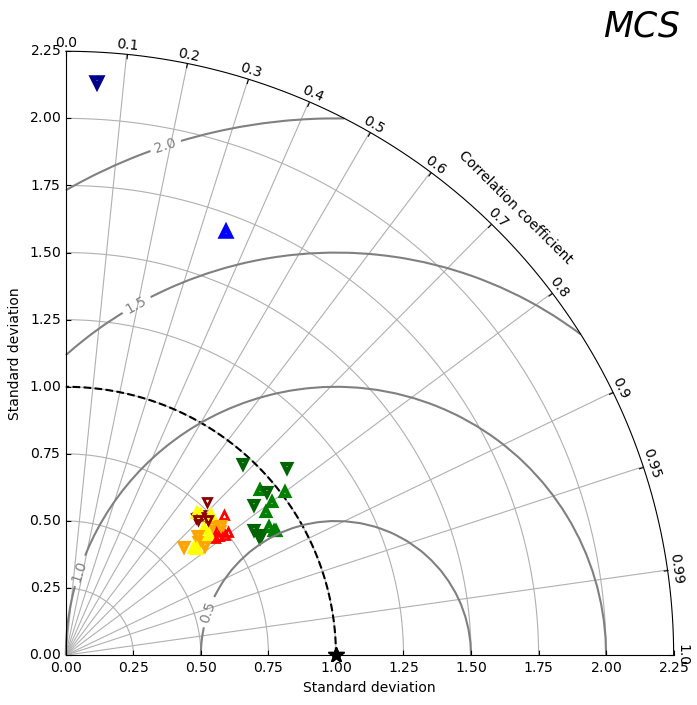

In [3]:
class TaylorDiagram(object):
  def __init__(self, STD ,fig=None, rect=111, label='_'):
    self.STD = STD
    tr = PolarAxes.PolarTransform()
    # Correlation labels
    rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))
    tlocs = np.arccos(rlocs) # Conversion to polar angles
    gl1 = gf.FixedLocator(tlocs) # Positions
    tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
    # Standard deviation axis extent
    self.smin = 0
    self.smax = 2.25 * self.STD
    gh = fa.GridHelperCurveLinear(tr,extremes=(0,(np.pi/2),self.smin,self.smax),grid_locator1=gl1,tick_formatter1=tf1,)
    if fig is None:
      fig = plt.figure()
    ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
    fig.add_subplot(ax)
    
    plt.title("MCS",loc='right',style='italic',fontsize = 25)
    
    # Angle axis
    ax.axis['top'].set_axis_direction('bottom')
    ax.axis['top'].label.set_text("Correlation coefficient")
    ax.axis['top'].toggle(ticklabels=True, label=True)
    ax.axis['top'].major_ticklabels.set_axis_direction('top')
    ax.axis['top'].label.set_axis_direction('top')
    # X axis
    ax.axis['left'].set_axis_direction('bottom')
    ax.axis['left'].label.set_text("Standard deviation")
    ax.axis['left'].toggle(ticklabels=True, label=True)
    ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
    ax.axis['left'].label.set_axis_direction('bottom')
    # Y axis
    ax.axis['right'].set_axis_direction('top')
    ax.axis['right'].label.set_text("Standard deviation")
    ax.axis['right'].toggle(ticklabels=True, label=True)
    ax.axis['right'].major_ticklabels.set_axis_direction('left')
    ax.axis['right'].label.set_axis_direction('top')
    # Useless
    ax.axis['bottom'].set_visible(False)
    # Contours along standard deviations
    ax.grid()
    self._ax = ax # Graphical axes
    self.ax = ax.get_aux_axes(tr) # Polar coordinates
    # Add reference point and STD contour
    l , = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
    l1 , = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
    t = np.linspace(0, (np.pi / 2.0))
    t1 = np.linspace(0, (np.pi / 2.0))
    r = np.zeros_like(t) + self.STD
    r1 = np.zeros_like(t) + self.STD
    self.ax.plot(t, r, 'k--', label='_')
    # Collect sample points for latter use (e.g. legend)
    self.samplePoints = [l]
    self.samplePoints = [l1]
  def add_sample(self,STD,r,*args,**kwargs):
    l,= self.ax.plot(np.arccos(r), STD, *args, **kwargs) # (theta, radius)
    self.samplePoints.append(l)
    return l

  def add_sample(self,STD,r1,*args,**kwargs):
    l1,= self.ax.plot(np.arccos(r1), STD, *args, **kwargs) # (theta, radius)
    self.samplePoints.append(l1)
    return l1

  def add_contours(self,levels=5,**kwargs):
    rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, (np.pi / 2.0)))
    RMSE=np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs  *np.cos(ts)))
    contours = self.ax.contour(ts, rs, RMSE, levels, **kwargs)
    return contours

def srl(obsSTD, s, s1, s2, s3, s4, s5, s6, s7, s8, s9, r, r1, r2, r3, r4, r5, r6, r7, r8, r9, l, l1, l2, l3, l4, l5, l6, l7, l8, l9,  fname):
  fig=plt.figure(figsize=(8,8))
  dia=TaylorDiagram(obsSTD, fig=fig, rect=111, label='ref')
  plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)
  srlc = zip(s, r, l)
  srlc1 = zip(s1, r1, l1)
  srlc2 = zip(s2, r2, l2)
  srlc3 = zip(s3, r3, l3)  
  srlc4 = zip(s4, r4, l4)  
  srlc5 = zip(s5, r5, l5)
  
  srlc6 = zip(s6, r6, l6)
  srlc7 = zip(s7, r7, l7)  
  srlc8 = zip(s8, r8, l8)  
  srlc9 = zip(s9, r9, l9)


  for i in srlc:
    dia.add_sample(i[0], i[1], label=i[2], marker='^',mec = 'red', mfc = 'none', mew=2)
  for i in srlc1:
    dia.add_sample(i[0], i[1], label=i[2], marker='v', mec = 'darkred', mfc = 'none', mew=2)
  for i in srlc2:
    dia.add_sample(i[0], i[1], label=i[2], marker='^', mec = 'yellow', mfc = 'none', mew=3)
  for i in srlc3:
    dia.add_sample(i[0], i[1], label=i[2], marker='v', mec = 'orange', mfc = 'none', mew=3)
  for i in srlc4:
    dia.add_sample(i[0], i[1], label=i[2], marker='^', mec = 'green', mfc = 'none', mew=3)
  for i in srlc5:
    dia.add_sample(i[0], i[1], label=i[2], marker='v', mec = 'darkgreen', mfc = 'none', mew=3)
    
  for i in srlc6:
    dia.add_sample(i[0], i[1], label=i[2], marker='^', mec = 'gray', mfc = 'none', mew=4)
  for i in srlc7:
    dia.add_sample(i[0], i[1], label=i[2], marker='v', mec = 'black', mfc = 'none', mew=4)
  for i in srlc8:
    dia.add_sample(i[0], i[1], label=i[2], marker='^', mec = 'blue', mfc = 'none', mew=4)
  for i in srlc9:
    dia.add_sample(i[0], i[1], label=i[2], marker='v', mec = 'darkblue', mfc = 'none', mew=4)
    
  #spl = [p.get_label() for p in dia.samplePoints]
  #fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='small'), loc=[-0.25,0.3])
  #plt.show()

obsSTD = 1

###Temp
# "KF_w/LTGDA"
l = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s= [0.755854632, 0.742256045503105, 0.721531067689045, 0.718869142733766, 0.705156830379796, 0.734189621222591, 0.784433161125941]
r= [0.79636, 0.7961, 0.78822, 0.78503, 0.78397, 0.7671, 0.74575]

# "KF_wo/LTGDA"
l1 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s1= [0.726759932419045, 0.725266745787006, 0.704186316022485, 0.710862066085707, 0.702074357511342, 0.724330165127352, 0.773194564435073]
r1= [0.72234, 0.70737, 0.69637, 0.68822,0.68529, 0.69151,0.67571]

###u comp wind
# "KF_w/LTGDA"
l2 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s2= [0.620138948274549,0.625887807079547,0.692750539067269,0.693148075051349,0.749620015959099,0.723327355804652,0.719828975864728]
r2= [0.76734,0.77425,0.76322,0.73582,0.71608,0.69377,0.67701]

# "KF_wo/LTGDA"
l3= ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s3= [0.649478788700412,0.655950975393203,0.734898107131905,0.726220920057888,0.748502416354093,0.662119989688825,0.59567003552218]
r3= [0.76194,0.78473,0.77662,0.74661,0.76542,0.73971,0.73607]

###v comp wind
# "KF_w/LTGDA"
l4 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s4= [0.905304431080948,0.899944742010607,0.889740168576216,0.912453846483229,0.953722422009654,1.01361358431634,0.945027616816829]
r4= [0.8607,0.8572,0.84494,0.81202,0.80165,0.79888,0.76009]

# "KF_wo/LTGDA"
l5 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s5= [0.842075228297568,0.842360378284714,0.835998841593807,0.892251737109956,0.961806175867704,1.07462830806921,0.967235981670631]
r5= [0.85386,0.84724,0.83128,0.77989,0.77438,0.76208,0.67711]


####IMERG

# "KF_w/LTGDA"
l6= ['w/LDA IMERG']
r6= [0.15505]
s6= [11.7678111889502]

# "KF_wo/LTGDA"
l7 = ['wo/LDA IMERG']
r7= [0.072749]
s7= [14.9333707283565]


####Stage-IV

# "KF_w/LTGDA"
l8 = ['w/LDA Stage-IV']
r8= [0.3526]
s8= [1.68415414609546]

# "KF_wo/LTGDA"
l9 = ['wo/LDA Stage-IV']
r9= [0.053799]
s9= [2.13719423463879]


fname = 'TaylorDiagram.jpg'
srl(obsSTD, s, s1, s2, s3, s4, s5, s6, s7, s8, s9, r, r1, r2, r3, r4, r5, r6, r7, r8, r9, l, l1, l2, l3, l4, l5, l6, l7, l8, l9, fname)

# MCS case, central US (11 June 2012) / physics opt: YSU

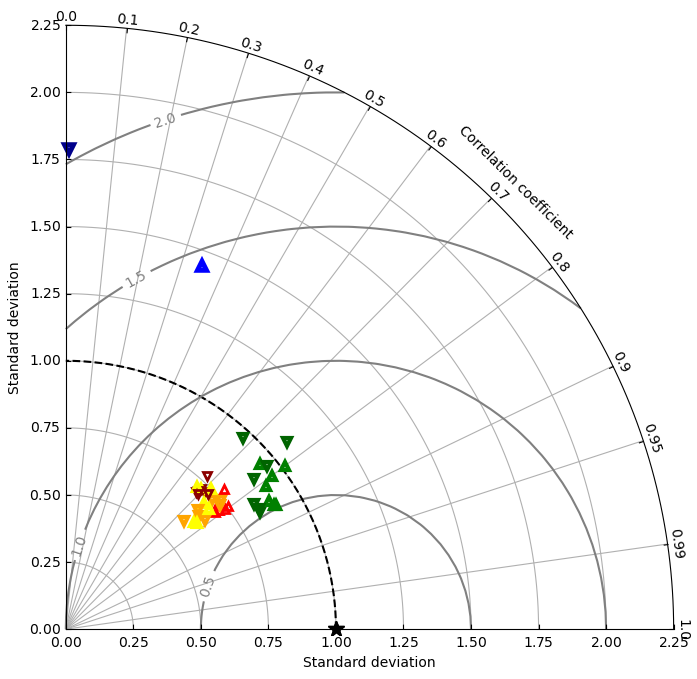

In [4]:
class TaylorDiagram(object):
  def __init__(self, STD ,fig=None, rect=111, label='_'):
    self.STD = STD
    tr = PolarAxes.PolarTransform()
    # Correlation labels
    rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))
    tlocs = np.arccos(rlocs) # Conversion to polar angles
    gl1 = gf.FixedLocator(tlocs) # Positions
    tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
    # Standard deviation axis extent
    self.smin = 0
    self.smax = 2.25 * self.STD
    gh = fa.GridHelperCurveLinear(tr,extremes=(0,(np.pi/2),self.smin,self.smax),grid_locator1=gl1,tick_formatter1=tf1,)
    if fig is None:
      fig = plt.figure()
    ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
    fig.add_subplot(ax)
    # Angle axis
    ax.axis['top'].set_axis_direction('bottom')
    ax.axis['top'].label.set_text("Correlation coefficient")
    ax.axis['top'].toggle(ticklabels=True, label=True)
    ax.axis['top'].major_ticklabels.set_axis_direction('top')
    ax.axis['top'].label.set_axis_direction('top')
    # X axis
    ax.axis['left'].set_axis_direction('bottom')
    ax.axis['left'].label.set_text("Standard deviation")
    ax.axis['left'].toggle(ticklabels=True, label=True)
    ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
    ax.axis['left'].label.set_axis_direction('bottom')
    # Y axis
    ax.axis['right'].set_axis_direction('top')
    ax.axis['right'].label.set_text("Standard deviation")
    ax.axis['right'].toggle(ticklabels=True, label=True)
    ax.axis['right'].major_ticklabels.set_axis_direction('left')
    ax.axis['right'].label.set_axis_direction('top')
    # Useless
    ax.axis['bottom'].set_visible(False)
    # Contours along standard deviations
    ax.grid()
    self._ax = ax # Graphical axes
    self.ax = ax.get_aux_axes(tr) # Polar coordinates
    # Add reference point and STD contour
    l , = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
    l1 , = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
    t = np.linspace(0, (np.pi / 2.0))
    t1 = np.linspace(0, (np.pi / 2.0))
    r = np.zeros_like(t) + self.STD
    r1 = np.zeros_like(t) + self.STD
    self.ax.plot(t, r, 'k--', label='_')
    # Collect sample points for latter use (e.g. legend)
    self.samplePoints = [l]
    self.samplePoints = [l1]
  def add_sample(self,STD,r,*args,**kwargs):
    l,= self.ax.plot(np.arccos(r), STD, *args, **kwargs) # (theta, radius)
    self.samplePoints.append(l)
    return l

  def add_sample(self,STD,r1,*args,**kwargs):
    l1,= self.ax.plot(np.arccos(r1), STD, *args, **kwargs) # (theta, radius)
    self.samplePoints.append(l1)
    return l1

  def add_contours(self,levels=5,**kwargs):
    rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, (np.pi / 2.0)))
    RMSE=np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs  *np.cos(ts)))
    contours = self.ax.contour(ts, rs, RMSE, levels, **kwargs)
    return contours

def srl(obsSTD, s, s1, s2, s3, s4, s5, s6, s7, s8, s9, r, r1, r2, r3, r4, r5, r6, r7, r8, r9, l, l1, l2, l3, l4, l5, l6, l7, l8, l9,  fname):
  fig=plt.figure(figsize=(8,8))
  dia=TaylorDiagram(obsSTD, fig=fig, rect=111, label='ref')
  plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)
  srlc = zip(s, r, l)
  srlc1 = zip(s1, r1, l1)
  srlc2 = zip(s2, r2, l2)
  srlc3 = zip(s3, r3, l3)  
  srlc4 = zip(s4, r4, l4)  
  srlc5 = zip(s5, r5, l5)
  
  srlc6 = zip(s6, r6, l6)
  srlc7 = zip(s7, r7, l7)  
  srlc8 = zip(s8, r8, l8)  
  srlc9 = zip(s9, r9, l9)


  for i in srlc:
    dia.add_sample(i[0], i[1], label=i[2], marker='^',mec = 'red', mfc = 'none', mew=2)
  for i in srlc1:
    dia.add_sample(i[0], i[1], label=i[2], marker='v', mec = 'darkred', mfc = 'none', mew=2)
  for i in srlc2:
    dia.add_sample(i[0], i[1], label=i[2], marker='^', mec = 'yellow', mfc = 'none', mew=3)
  for i in srlc3:
    dia.add_sample(i[0], i[1], label=i[2], marker='v', mec = 'orange', mfc = 'none', mew=3)
  for i in srlc4:
    dia.add_sample(i[0], i[1], label=i[2], marker='^', mec = 'green', mfc = 'none', mew=3)
  for i in srlc5:
    dia.add_sample(i[0], i[1], label=i[2], marker='v', mec = 'darkgreen', mfc = 'none', mew=3)
    
  for i in srlc6:
    dia.add_sample(i[0], i[1], label=i[2], marker='^', mec = 'gray', mfc = 'none', mew=4)
  for i in srlc7:
    dia.add_sample(i[0], i[1], label=i[2], marker='v', mec = 'black', mfc = 'none', mew=4)
  for i in srlc8:
    dia.add_sample(i[0], i[1], label=i[2], marker='^', mec = 'blue', mfc = 'none', mew=4)
  for i in srlc9:
    dia.add_sample(i[0], i[1], label=i[2], marker='v', mec = 'darkblue', mfc = 'none', mew=4)
    
  #spl = [p.get_label() for p in dia.samplePoints]
  #fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='small'), loc=[-0.25,0.3])
  #plt.show()

obsSTD = 1

###Temp
# "KF_w/LTGDA"
l = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s= [0.755854632, 0.742256045503105, 0.721531067689045, 0.718869142733766, 0.705156830379796, 0.734189621222591, 0.784433161125941]
r= [0.79636, 0.7961, 0.78822, 0.78503, 0.78397, 0.7671, 0.74575]

# "KF_wo/LTGDA"
l1 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s1= [0.726759932419045, 0.725266745787006, 0.704186316022485, 0.710862066085707, 0.702074357511342, 0.724330165127352, 0.773194564435073]
r1= [0.72234, 0.70737, 0.69637, 0.68822,0.68529, 0.69151,0.67571]

###u comp wind
# "KF_w/LTGDA"
l2 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s2= [0.620138948274549,0.625887807079547,0.692750539067269,0.693148075051349,0.749620015959099,0.723327355804652,0.719828975864728]
r2= [0.76734,0.77425,0.76322,0.73582,0.71608,0.69377,0.67701]

# "KF_wo/LTGDA"
l3= ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s3= [0.649478788700412,0.655950975393203,0.734898107131905,0.726220920057888,0.748502416354093,0.662119989688825,0.59567003552218]
r3= [0.76194,0.78473,0.77662,0.74661,0.76542,0.73971,0.73607]

###v comp wind
# "KF_w/LTGDA"
l4 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s4= [0.905304431080948,0.899944742010607,0.889740168576216,0.912453846483229,0.953722422009654,1.01361358431634,0.945027616816829]
r4= [0.8607,0.8572,0.84494,0.81202,0.80165,0.79888,0.76009]

# "KF_wo/LTGDA"
l5 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s5= [0.842075228297568,0.842360378284714,0.835998841593807,0.892251737109956,0.961806175867704,1.07462830806921,0.967235981670631]
r5= [0.85386,0.84724,0.83128,0.77989,0.77438,0.76208,0.67711]


####IMERG

# "KF_w/LTGDA"
l6= ['w/LDA IMERG']
r6= [0.18051]
s6= [10.0880177927002]

# "KF_wo/LTGDA"
l7 = ['wo/LDA IMERG']
r7= [0.040729]
s7= [12.5026148684641]


####Stage-IV

# "KF_w/LTGDA"
l8 = ['w/LDA Stage-IV']
r8= [0.34844]
s8= [1.44374996493945]

# "KF_wo/LTGDA"
l9 = ['wo/LDA Stage-IV']
r9= [0.0066193]
s9= [1.78931581495207]


fname = 'TaylorDiagram.jpg'
srl(obsSTD, s, s1, s2, s3, s4, s5, s6, s7, s8, s9, r, r1, r2, r3, r4, r5, r6, r7, r8, r9, l, l1, l2, l3, l4, l5, l6, l7, l8, l9, fname)

# MCS case, central US (11 June 2012) / physics opt: 777

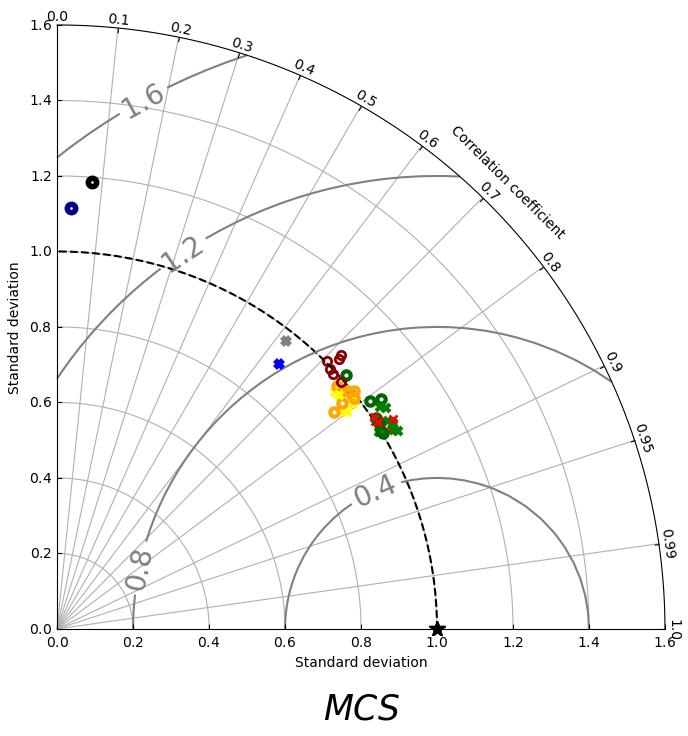

In [5]:
class TaylorDiagram(object):
  def __init__(self, STD ,fig=None, rect=111, label='_'):
    self.STD = STD
    tr = PolarAxes.PolarTransform()
    # Correlation labels
    rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))
    tlocs = np.arccos(rlocs) # Conversion to polar angles
    gl1 = gf.FixedLocator(tlocs) # Positions
    tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
    # Standard deviation axis extent
    self.smin = 0
    self.smax = 1.6 * self.STD
    gh = fa.GridHelperCurveLinear(tr,extremes=(0,(np.pi/2),self.smin,self.smax),grid_locator1=gl1,tick_formatter1=tf1,)
    if fig is None:
      fig = plt.figure()
    ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
    fig.add_subplot(ax)
    
    plt.title("MCS",y=-0.15,style='italic',fontsize = 25)
        
        
    # Angle axis
    ax.axis['top'].set_axis_direction('bottom')
    ax.axis['top'].label.set_text("Correlation coefficient")
    ax.axis['top'].toggle(ticklabels=True, label=True)
    ax.axis['top'].major_ticklabels.set_axis_direction('top')
    ax.axis['top'].label.set_axis_direction('top')
    # X axis
    ax.axis['left'].set_axis_direction('bottom')
    ax.axis['left'].label.set_text("Standard deviation")
    ax.axis['left'].toggle(ticklabels=True, label=True)
    ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
    ax.axis['left'].label.set_axis_direction('bottom')
    # Y axis
    ax.axis['right'].set_axis_direction('top')
    ax.axis['right'].label.set_text("Standard deviation")
    ax.axis['right'].toggle(ticklabels=True, label=True)
    ax.axis['right'].major_ticklabels.set_axis_direction('left')
    ax.axis['right'].label.set_axis_direction('top')
    # Useless
    ax.axis['bottom'].set_visible(False)
    # Contours along standard deviations
    ax.grid()
    self._ax = ax # Graphical axes
    self.ax = ax.get_aux_axes(tr) # Polar coordinates
    # Add reference point and STD contour
    l , = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
    l1 , = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
    t = np.linspace(0, (np.pi / 2.0))
    t1 = np.linspace(0, (np.pi / 2.0))
    r = np.zeros_like(t) + self.STD
    r1 = np.zeros_like(t) + self.STD
    self.ax.plot(t, r, 'k--', label='_')
    # Collect sample points for latter use (e.g. legend)
    self.samplePoints = [l]
    self.samplePoints = [l1]
  def add_sample(self,STD,r,*args,**kwargs):
    l,= self.ax.plot(np.arccos(r), STD, *args, **kwargs) # (theta, radius)
    self.samplePoints.append(l)
    return l

  def add_sample(self,STD,r1,*args,**kwargs):
    l1,= self.ax.plot(np.arccos(r1), STD, *args, **kwargs) # (theta, radius)
    self.samplePoints.append(l1)
    return l1

  def add_contours(self,levels=5,**kwargs):
    rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, (np.pi / 2.0)))
    RMSE=np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs  *np.cos(ts)))
    contours = self.ax.contour(ts, rs, RMSE, levels, **kwargs)
    return contours

def srl(obsSTD, s, s1, s2, s3, s4, s5, s6, s7, s8, s9, r, r1, r2, r3, r4, r5, r6, r7, r8, r9, l, l1, l2, l3, l4, l5, l6, l7, l8, l9,  fname):
  fig=plt.figure(figsize=(8,8))
  dia=TaylorDiagram(obsSTD, fig=fig, rect=111, label='ref')
  plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=20)
  srlc = zip(s, r, l)
  srlc1 = zip(s1, r1, l1)
  srlc2 = zip(s2, r2, l2)
  srlc3 = zip(s3, r3, l3)  
  srlc4 = zip(s4, r4, l4)  
  srlc5 = zip(s5, r5, l5)
  
  srlc6 = zip(s6, r6, l6)
  srlc7 = zip(s7, r7, l7)  
  srlc8 = zip(s8, r8, l8)  
  srlc9 = zip(s9, r9, l9)

  for i in srlc:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'red', mfc = 'none', mew=2)
  for i in srlc1:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'darkred', mfc = 'none', mew=2)
  for i in srlc2:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'yellow', mfc = 'none', mew=3)
  for i in srlc3:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'orange', mfc = 'none', mew=3)
  for i in srlc4:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'green', mfc = 'none', mew=3)
  for i in srlc5:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'darkgreen', mfc = 'none', mew=3)
    
  for i in srlc6:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'gray', mfc = 'none', mew=4)
  for i in srlc7:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'black', mfc = 'none', mew=4)
  for i in srlc8:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'blue', mfc = 'none', mew=4)
  for i in srlc9:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'darkblue', mfc = 'none', mew=4)
    
  #spl = [p.get_label() for p in dia.samplePoints]
  #fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='small'), loc=[-0.25,0.3])
  #plt.show()

obsSTD = 1

###Temp
# "KF_w/LTGDA"
l = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s= [1.001272692,1.004403738,1.005464291,1.009536127,1.009562896,1.024694683,1.043702852]
r= [0.83521,0.82983,0.83911,0.84188,0.83716,0.85726,0.84659,0.82302]

# "KF_wo/LTGDA"
l1 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s1= [0.992602336,0.992565927,0.990386338,0.995122205,1.004610163,1.030025589,1.040757378]
r1= [0.78083,0.75223,0.73245,0.72116,0.70777,0.72053,0.71794,0.69009]

###u comp wind
# "KF_w/LTGDA"
l2 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s2= [0.9636141408,0.966504926,0.9944582697,0.9797111354,0.9817347031,0.9546129212,0.9435076616]
r2= [0.75916,0.76664,0.78472,0.79386,0.76213,0.79806,0.79108,0.76942]

# "KF_wo/LTGDA"
l3= ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s3= [0.978042416,0.979175719,1.004292498,0.992993816,0.992776206,0.959927734,0.928916019]
r3= [0.75404,0.7658,0.77938,0.78737,0.77242,0.78209,0.78554,0.80904]

###v comp wind
# "KF_w/LTGDA"
l4 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s4= [1.038799366,1.038608443,1.030669157,1.030708846,1.033064732,1.04585981,0.9955852451]
r4= [0.85098,0.86333,0.86017,0.84451,0.82263,0.82836,0.85193,0.75549]

# "KF_wo/LTGDA"
l5 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s5= [1.007050287,1.00325211,1.000341963,1.007690385,1.020741515,1.047123396,1.015761159]
r5= [0.84064,0.85542,0.85148,0.8327,0.80658,0.81433,0.74821,0.68707]


####IMERG

# "KF_w/LTGDA"
l6= ['w/LDA IMERG']
r6= [0.61919]
s6= [0.971432548]

# "KF_wo/LTGDA"
l7 = ['wo/LDA IMERG']
r7= [0.077973]
s7= [1.186845338]



####Stage-IV

# "KF_w/LTGDA"
l8 = ['w/LDA Stage-IV']
r8= [0.63907]
s8= [0.91411551083647]

# "KF_wo/LTGDA"
l9 = ['wo/LDA Stage-IV']
r9= [0.03365]
s9= [1.11681838829882]


fname = 'TaylorDiagram.jpg'
srl(obsSTD, s, s1, s2, s3, s4, s5, s6, s7, s8, s9, r, r1, r2, r3, r4, r5, r6, r7, r8, r9, l, l1, l2, l3, l4, l5, l6, l7, l8, l9, fname)

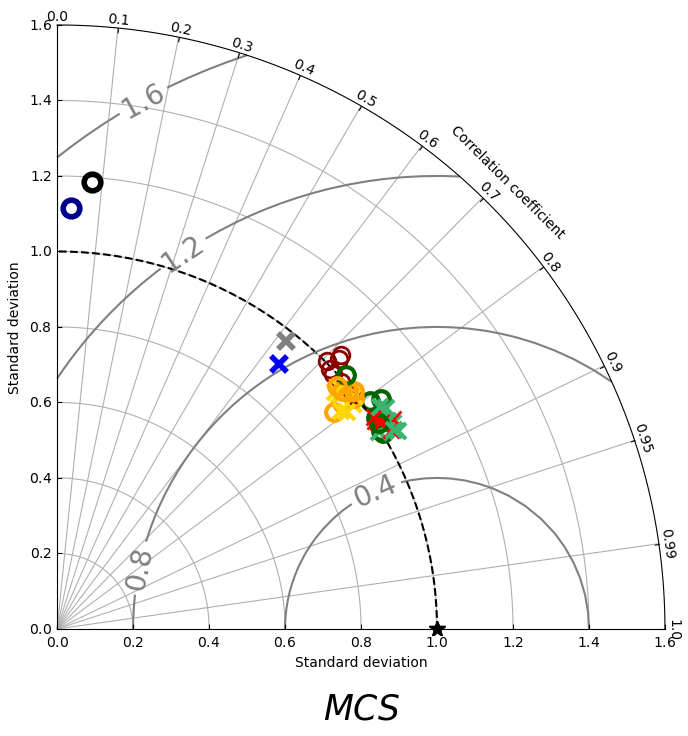

In [70]:
class TaylorDiagram(object):
  def __init__(self, STD ,fig=None, rect=111, label='_'):
    self.STD = STD
    tr = PolarAxes.PolarTransform()
    # Correlation labels
    rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))
    tlocs = np.arccos(rlocs) # Conversion to polar angles
    gl1 = gf.FixedLocator(tlocs) # Positions
    tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
    # Standard deviation axis extent
    self.smin = 0
    self.smax = 1.6 * self.STD
    gh = fa.GridHelperCurveLinear(tr,extremes=(0,(np.pi/2),self.smin,self.smax),grid_locator1=gl1,tick_formatter1=tf1,)
    if fig is None:
      fig = plt.figure()
    ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
    fig.add_subplot(ax)
    
    plt.title("MCS",y=-0.15,style='italic',fontsize = 25)
        
        
    # Angle axis
    ax.axis['top'].set_axis_direction('bottom')
    ax.axis['top'].label.set_text("Correlation coefficient")
    ax.axis['top'].toggle(ticklabels=True, label=True)
    ax.axis['top'].major_ticklabels.set_axis_direction('top')
    ax.axis['top'].label.set_axis_direction('top')
    # X axis
    ax.axis['left'].set_axis_direction('bottom')
    ax.axis['left'].label.set_text("Standard deviation")
    ax.axis['left'].toggle(ticklabels=True, label=True)
    ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
    ax.axis['left'].label.set_axis_direction('bottom')
    # Y axis
    ax.axis['right'].set_axis_direction('top')
    ax.axis['right'].label.set_text("Standard deviation")
    ax.axis['right'].toggle(ticklabels=True, label=True)
    ax.axis['right'].major_ticklabels.set_axis_direction('left')
    ax.axis['right'].label.set_axis_direction('top')
    # Useless
    ax.axis['bottom'].set_visible(False)
    # Contours along standard deviations
    ax.grid()
    self._ax = ax # Graphical axes
    self.ax = ax.get_aux_axes(tr) # Polar coordinates
    # Add reference point and STD contour
    l , = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
    l1 , = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
    t = np.linspace(0, (np.pi / 2.0))
    t1 = np.linspace(0, (np.pi / 2.0))
    r = np.zeros_like(t) + self.STD
    r1 = np.zeros_like(t) + self.STD
    self.ax.plot(t, r, 'k--', label='_')
    # Collect sample points for latter use (e.g. legend)
    self.samplePoints = [l]
    self.samplePoints = [l1]
  def add_sample(self,STD,r,*args,**kwargs):
    l,= self.ax.plot(np.arccos(r), STD, *args, **kwargs) # (theta, radius)
    self.samplePoints.append(l)
    return l

  def add_sample(self,STD,r1,*args,**kwargs):
    l1,= self.ax.plot(np.arccos(r1), STD, *args, **kwargs) # (theta, radius)
    self.samplePoints.append(l1)
    return l1

  def add_contours(self,levels=5,**kwargs):
    rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, (np.pi / 2.0)))
    RMSE=np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs  *np.cos(ts)))
    contours = self.ax.contour(ts, rs, RMSE, levels, **kwargs)
    return contours

def srl(obsSTD, s, s1, s2, s3, s4, s5, s6, s7, s8, s9, r, r1, r2, r3, r4, r5, r6, r7, r8, r9, l, l1, l2, l3, l4, l5, l6, l7, l8, l9,  fname):
  fig=plt.figure(figsize=(8,8))
  dia=TaylorDiagram(obsSTD, fig=fig, rect=111, label='ref')
  plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=20)
  srlc = zip(s, r, l)
  srlc1 = zip(s1, r1, l1)
  srlc2 = zip(s2, r2, l2)
  srlc3 = zip(s3, r3, l3)  
  srlc4 = zip(s4, r4, l4)  
  srlc5 = zip(s5, r5, l5)
  
  srlc6 = zip(s6, r6, l6)
  srlc7 = zip(s7, r7, l7)  
  srlc8 = zip(s8, r8, l8)  
  srlc9 = zip(s9, r9, l9)

  for i in srlc:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'red', mfc = 'none', mew=2, ms=12)
  for i in srlc1:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'darkred', mfc = 'none', mew=2, ms=12)
  for i in srlc2:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'gold', mfc = 'none', mew=3, ms=12)
  for i in srlc3:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'orange', mfc = 'none', mew=3, ms=12)
  for i in srlc4:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'mediumseagreen', mfc = 'none', mew=3, ms=12)
  for i in srlc5:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'darkgreen', mfc = 'none', mew=3, ms=12)
    
  for i in srlc6:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'gray', mfc = 'none', mew=4, ms=12)
  for i in srlc7:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'black', mfc = 'none', mew=4, ms=12)
  for i in srlc8:
    dia.add_sample(i[0], i[1], label=i[2], marker='x', mec = 'blue', mfc = 'none', mew=4, ms=12)
  for i in srlc9:
    dia.add_sample(i[0], i[1], label=i[2], marker='o', mec = 'darkblue', mfc = 'none', mew=4, ms=12)
    
  #spl = [p.get_label() for p in dia.samplePoints]
  #fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='small'), loc=[-0.25,0.3])
  #plt.show()

obsSTD = 1

###Temp
# "KF_w/LTGDA"
l = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s= [1.001272692,1.004403738,1.005464291,1.009536127,1.009562896,1.024694683,1.043702852]
r= [0.83521,0.82983,0.83911,0.84188,0.83716,0.85726,0.84659,0.82302]

# "KF_wo/LTGDA"
l1 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s1= [0.992602336,0.992565927,0.990386338,0.995122205,1.004610163,1.030025589,1.040757378]
r1= [0.78083,0.75223,0.73245,0.72116,0.70777,0.72053,0.71794,0.69009]

###u comp wind
# "KF_w/LTGDA"
l2 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s2= [0.9636141408,0.966504926,0.9944582697,0.9797111354,0.9817347031,0.9546129212,0.9435076616]
r2= [0.75916,0.76664,0.78472,0.79386,0.76213,0.79806,0.79108,0.76942]

# "KF_wo/LTGDA"
l3= ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s3= [0.978042416,0.979175719,1.004292498,0.992993816,0.992776206,0.959927734,0.928916019]
r3= [0.75404,0.7658,0.77938,0.78737,0.77242,0.78209,0.78554,0.80904]

###v comp wind
# "KF_w/LTGDA"
l4 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s4= [1.038799366,1.038608443,1.030669157,1.030708846,1.033064732,1.04585981,0.9955852451]
r4= [0.85098,0.86333,0.86017,0.84451,0.82263,0.82836,0.85193,0.75549]

# "KF_wo/LTGDA"
l5 = ['18:00','19:00','20:00','21:00','22:00','23:00','00:00']
s5= [1.007050287,1.00325211,1.000341963,1.007690385,1.020741515,1.047123396,1.015761159]
r5= [0.84064,0.85542,0.85148,0.8327,0.80658,0.81433,0.74821,0.68707]


####IMERG

# "KF_w/LTGDA"
l6= ['w/LDA IMERG']
r6= [0.61919]
s6= [0.971432548]

# "KF_wo/LTGDA"
l7 = ['wo/LDA IMERG']
r7= [0.077973]
s7= [1.186845338]



####Stage-IV

# "KF_w/LTGDA"
l8 = ['w/LDA Stage-IV']
r8= [0.63907]
s8= [0.91411551083647]

# "KF_wo/LTGDA"
l9 = ['wo/LDA Stage-IV']
r9= [0.03365]
s9= [1.11681838829882]


fname = 'TaylorDiagram.jpg'
srl(obsSTD, s, s1, s2, s3, s4, s5, s6, s7, s8, s9, r, r1, r2, r3, r4, r5, r6, r7, r8, r9, l, l1, l2, l3, l4, l5, l6, l7, l8, l9, fname)